In [ ]:
!pip install kaggle
import os
import zipfile

# Set Kaggle API credentials
os.environ['KAGGLE_USERNAME'] = "your_kaggle_username"  # Replace with your Kaggle username
os.environ['KAGGLE_KEY'] = "your_kaggle_api_key"  # Replace with your Kaggle API key

# Download the dataset from Kaggle
!kaggle datasets download csafrit2/plant-leaves-for-image-classification

# Extract the contents of the zip file
with zipfile.ZipFile("plant-leaves-for-image-classification.zip", "r") as zip_ref:
    zip_ref.extractall()

Dataset URL: https://www.kaggle.com/datasets/csafrit2/plant-leaves-for-image-classification
License(s): Community Data License Agreement - Sharing - Version 1.0
100% 6.56G/6.56G [04:11<00:00, 28.7MB/s]
100% 6.56G/6.56G [04:11<00:00, 28.0MB/s]


In [ ]:
# walk thruogh plant image data
import os

for dirpath, dirnames, filenames in os.walk("/content/Plants_2"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 4 directories and 0 images in '/content/Plants_2'.
There are 22 directories and 0 images in '/content/Plants_2/valid'.
There are 0 directories and 5 images in '/content/Plants_2/valid/Pongamia Pinnata diseased (P7b)'.
There are 0 directories and 5 images in '/content/Plants_2/valid/Pomegranate healthy (P9a)'.
There are 0 directories and 5 images in '/content/Plants_2/valid/Lemon healthy (P10a)'.
There are 0 directories and 5 images in '/content/Plants_2/valid/Basil healthy (P8)'.
There are 0 directories and 5 images in '/content/Plants_2/valid/Mango healthy (P0a)'.
There are 0 directories and 5 images in '/content/Plants_2/valid/Mango diseased (P0b)'.
There are 0 directories and 5 images in '/content/Plants_2/valid/Gauva diseased (P3b)'.
There are 0 directories and 5 images in '/content/Plants_2/valid/Jatropha diseased (P6b)'.
There are 0 directories and 5 images in '/content/Plants_2/valid/Pongamia Pinnata healthy (P7a)'.
There are 0 directories and 5 images in '/content/Pla

In [ ]:
!ls -la /content/Plants_2

total 24
drwxr-xr-x  6 root root 4096 Feb  2 10:49  .
drwxr-xr-x  1 root root 4096 Feb  2 10:48  ..
drwxr-xr-x  2 root root 4096 Feb  2 10:48 'images to predict'
drwxr-xr-x 24 root root 4096 Feb  2 10:48  test
drwxr-xr-x 24 root root 4096 Feb  2 10:49  train
drwxr-xr-x 24 root root 4096 Feb  2 10:49  valid


In [ ]:
# setup the train and test directories

train_dir = "/content/Plants_2/train/"
test_dir = "/content/Plants_2/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Alstonia Scholaris diseased (P2a)' 'Alstonia Scholaris healthy (P2b)'
 'Arjun diseased (P1a)' 'Arjun healthy (P1b)' 'Bael diseased (P4b)'
 'Basil healthy (P8)' 'Chinar diseased (P11b)' 'Chinar healthy (P11a)'
 'Gauva diseased (P3b)' 'Gauva healthy (P3a)' 'Jamun diseased (P5b)'
 'Jamun healthy (P5a)' 'Jatropha diseased (P6b)' 'Jatropha healthy (P6a)'
 'Lemon diseased (P10b)' 'Lemon healthy (P10a)' 'Mango diseased (P0b)'
 'Mango healthy (P0a)' 'Pomegranate diseased (P9b)'
 'Pomegranate healthy (P9a)' 'Pongamia Pinnata diseased (P7b)'
 'Pongamia Pinnata healthy (P7a)']


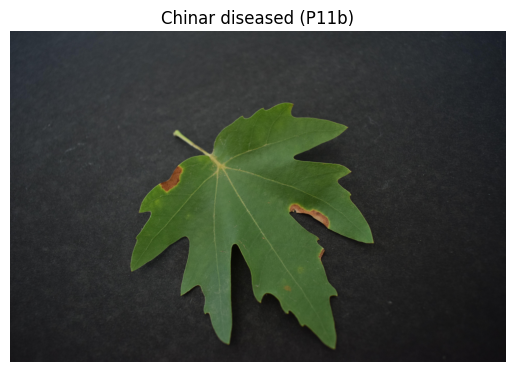

In [ ]:
# Visualized

import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def view_random_image(target_dir, target_class):
  """
  This function displays a random image from a specified directory and class.

  Args:
    target_dir: The directory containing the images.
    target_class: The class of the image to display.
  """
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  return img

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

# 2. Preprocess the data (Prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale
train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)

# Load data in from directoreis and turn it into batchess
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 4274 images belonging to 22 classes.
Found 110 images belonging to 22 classes.


# 3. Creat a model(start with baseline)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Creat oue model

model = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224,3)),
    Activation('relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(22, activation='softmax')
])

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit a model
history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 555s 4s/step - accuracy: 0.3135 - loss: 2.2162 - val_accuracy: 0.6636 - val_loss: 1.3189
Epoch 2/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 568s 4s/step - accuracy: 0.7948 - loss: 0.6687 - val_accuracy: 0.7273 - val_loss: 1.2430
Epoch 3/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 568s 4s/step - accuracy: 0.8577 - loss: 0.4444 - val_accuracy: 0.7000 - val_loss: 1.3600
Epoch 4/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 664s 5s/step - accuracy: 0.9125 - loss: 0.2835 - val_accuracy: 0.6909 - val_loss: 1.5702
Epoch 5/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 521s 4s/step - accuracy: 0.9400 - loss: 0.1970 - val_accuracy: 0.6727 - val_loss: 2.1899


# 4. Evaulate the model

In [ ]:
model.evaluate(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.6722 - loss: 2.4561


[2.1898767948150635, 0.6727272868156433]

<Axes: >

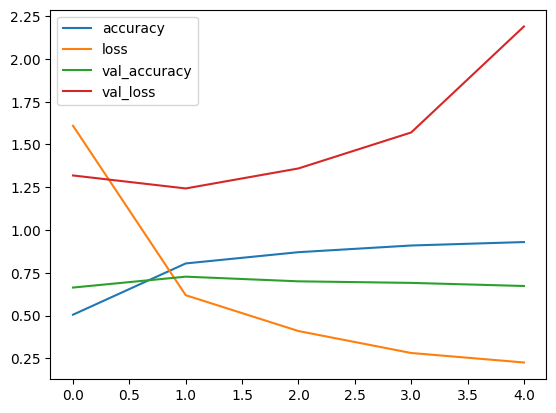

In [ ]:
# check out the  model's loss curves on the plants_2
import pandas as pd
pd.DataFrame(history.history).plot()

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  # """
  # Returns separate loss curves for training and validation metrics.

  # Args:
  #   history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  # """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

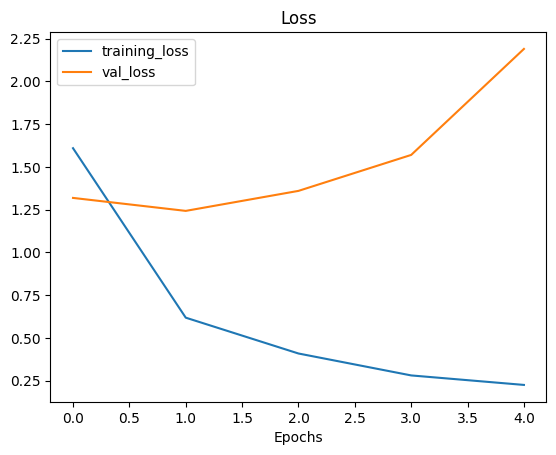

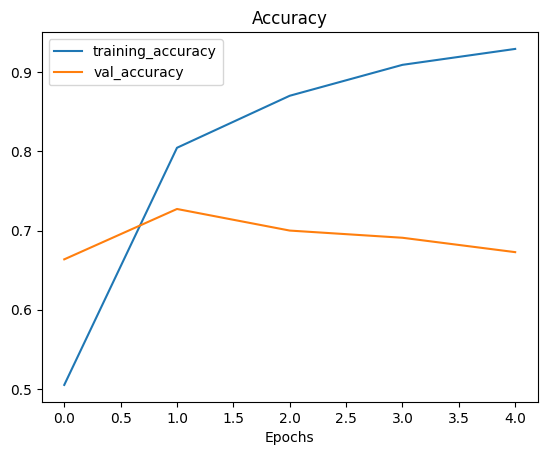

In [ ]:
plot_loss_curves(history)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 222, 222, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 22)                  │         618,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,863,038 (7.11 MB)

 Trainable params: 621,012 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,242,026 (4.74 MB)

In [ ]:
# # Creat oue model
# remove 2 convolution layers...

# model_1 = Sequential([
#     Conv2D(10, 3, activation='relu', input_shape=(224, 224,3)),
#     Activation('relu'),
#     MaxPool2D(),
#     Conv2D(10, 3, activation='relu'),
#     MaxPool2D(),
#     Flatten(),
#     Dense(22, activation='softmax')
# ])

# # Compile the model
# model_1.compile(loss="categorical_crossentropy",
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=["accuracy"])

# # Fit a model
# history_1 = model_1.fit(train_data,
#                     epochs=5,
#                     steps_per_epoch=len(train_data),
#                     validation_data=test_data,
#                     validation_steps=len(test_data))


# Trying to reduce overfitting with data augmentation

In [ ]:
train_datagen_augmentation= ImageDataGenerator(rescale=1/255.,
                                  rotation_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

train_datagen_augmentation= train_datagen_augmentation.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')



Found 4274 images belonging to 22 classes.


In [ ]:
# Let's creat another model but this time we'll fit on the augmentation train
model_1 =  Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224,3)),
    Activation('relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(22, activation='softmax')
])


# Compile the cloned model (using the same setup as previos models)
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_datagen_augmentation,
                    epochs=5,
                    steps_per_epoch=len(train_datagen_augmentation),
                    validation_data=test_data,
                    validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 528s 4s/step - accuracy: 0.2761 - loss: 2.3820 - val_accuracy: 0.4818 - val_loss: 2.4528
Epoch 2/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 613s 4s/step - accuracy: 0.6419 - loss: 1.1530 - val_accuracy: 0.6000 - val_loss: 1.2031
Epoch 3/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 565s 4s/step - accuracy: 0.7715 - loss: 0.7685 - val_accuracy: 0.7455 - val_loss: 0.8879
Epoch 4/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 622s 4s/step - accuracy: 0.8125 - loss: 0.6095 - val_accuracy: 0.7364 - val_loss: 1.1457
Epoch 5/5
134/134 ━━━━━━━━━━━━━━━━━━━━ 654s 5s/step - accuracy: 0.7943 - loss: 0.6231 - val_accuracy: 0.6636 - val_loss: 1.1208


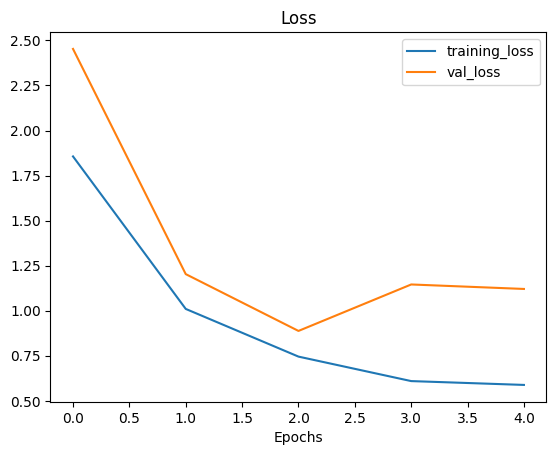

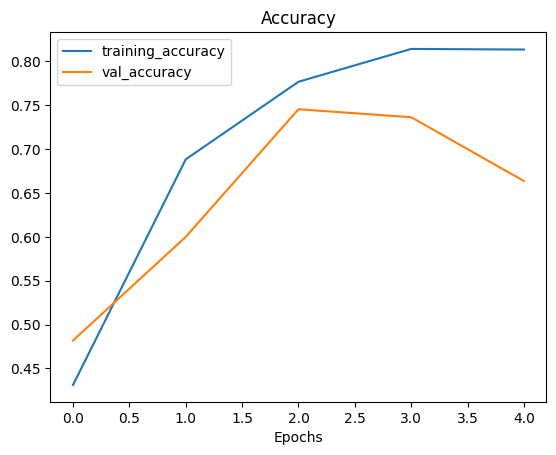

In [ ]:
plot_loss_curves(history_1)

In [ ]:
model_1.evaluate(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.6665 - loss: 1.1128


[1.120836853981018, 0.6636363863945007]